In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import re


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import re

In [2]:
url = 'https://www.codigounico.com/business-class/lista-forbes-2018-los-futbolistas-mejor-pagados-del-mundo.html'


In [3]:
data = requests.get(url)

data.status_code

200

In [4]:
soup = BeautifulSoup(data.text)
print(str(soup)[:200])

<!DOCTYPE html>
<!--[if lt IE 7]><html lang="es-ES" prefix="og: http://ogp.me/ns#" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if (IE 7)&!(IEMobile)]><html lang="es-ES" prefix="og: http://ogp


In [5]:
# La línea de código html
# <td class="salario" style="text-align: right;">84&nbsp;millones $</td>

In [6]:
# Llamo al "elemento", que en este caso es 'tr'

asd2 = soup.findAll('tr')

In [7]:
# Imprimo la variable

#asd2

In [29]:
# Hqgo el web-scraping de los ámbitos que me interesan

nombres = soup.findAll('td',attrs={'class':'nombre'})
salario = soup.findAll('td',attrs={'class':'salario'})
publicidad = soup.findAll('td',attrs={'class':'contratos de publicidad'})
total = soup.findAll('td',attrs={'class':'total'})

In [30]:
# Meto de cada elemento en una lista (con el formato .text)

lst_nombres = []
lst_salarios = []
lst_publicidad = []
lst_total = []

for i in nombres:
    lst_nombres.append(i.text)

for i in salario:
    lst_salarios.append(i.text)
    
for i in publicidad:
    lst_publicidad.append(i.text)
    
for i in total:
    lst_total.append(i.text)

In [31]:
# Lista 1

lst_nombres

['Lionel Messi',
 'Cristiano Ronaldo',
 'Neymar Jr.',
 'Gareth Bale',
 'Paul Pogba',
 'Oscar',
 'Wayne Rooney',
 'Luis Suárez',
 'Kun Agüero']

In [32]:
# Lista 2

lst_salarios

['84\xa0millones $',
 '61\xa0millones $',
 '73\xa0millones $',
 '28,6\xa0millones $',
 '25\xa0millones $',
 '25,9\xa0millones\xa0$',
 '22\xa0millones $',
 '19,9\xa0millones\xa0$',
 '17 millones\xa0$']

In [33]:
# Limpio la lista 2

sal = []

for numbers in lst_salarios:
    a = numbers.replace("\xa0millones $", "").replace("\xa0millones\xa0","").replace(" millones\xa0$","").replace("$","")
    sal.append(a)
    
sal

['84', '61', '73', '28,6', '25', '25,9', '22', '19,9', '17']

In [34]:
# Lista 3

lst_publicidad

['27\xa0$',
 '47 $',
 '17\xa0$',
 '6\xa0$',
 '4,5\xa0$',
 '1,5\xa0$',
 '5\xa0$',
 '7 $',
 '6\xa0$']

In [35]:
# Limpio la lista 3

publi = []

for numbers in lst_publicidad:
    x = numbers.replace("\xa0$", "").replace("$","")
    publi.append(x)

publi


['27', '47 ', '17', '6', '4,5', '1,5', '5', '7 ', '6']

In [36]:
# Lista 4

lst_total

['111\xa0$',
 '108\xa0$',
 '90\xa0$',
 '34,6\xa0$',
 '29,5\xa0$',
 '27,4\xa0$',
 '27\xa0$',
 '26,9\xa0$',
 '23,5\xa0$']

In [37]:
# Limpio la lista 4

total = []

for numbers in lst_total:
    z = numbers.replace("\xa0$", "").replace("$","")
    total.append(z)

total

['111', '108', '90', '34,6', '29,5', '27,4', '27', '26,9', '23,5']

In [38]:
# Forma 1 para hacer un dataFrame con listas (sólo añado una)

df_total = pd.DataFrame(lst_nombres) 

df_total

,0
0,Lionel Messi
1,Cristiano Ronaldo
2,Neymar Jr.
3,Gareth Bale
4,Paul Pogba
5,Oscar
6,Wayne Rooney
7,Luis Suárez
8,Kun Agüero


In [54]:
# Forma 2 para hacer un dataFrame con listas (añado todas en forma de diccionario)

clients = {'Nombre' : lst_nombres,
           'Salary' : sal,
           'Publicity' : publi,
           'Total Revenue' : total}
clients1 = pd.DataFrame.from_dict(clients)
clients1

,Nombre,Salary,Publicity,Total Revenue
0,Lionel Messi,84,27,111
1,Cristiano Ronaldo,61,47,108
2,Neymar Jr.,73,17,90
3,Gareth Bale,"28,6",6,"34,6"
4,Paul Pogba,25,"4,5","29,5"
5,Oscar,"25,9","1,5","27,4"
6,Wayne Rooney,22,5,27
7,Luis Suárez,"19,9",7,"26,9"
8,Kun Agüero,17,6,"23,5"


In [55]:
# Abro el dataFrame original

df = pd.read_csv("soccer.csv", engine="python")

In [81]:
# Imprimo el dataFrame right

df_clean = df[["Name","Nationality","Club","Club_Kit","Rating"]]

df_clean = df_clean[df_clean.Rating>=90]
df_clean = df_clean.replace('Neymar', 'Neymar Jr.')
df_clean = df_clean .replace('Luis SuÃ¡rez', 'Luis Suárez')
df_clean = df_clean.replace('Zlatan IbrahimoviÄ‡', 'Zlatan Ibrahimović')


df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
5,De Gea,Spain,Manchester Utd,1.0,90
6,Robert Lewandowski,Poland,FC Bayern,9.0,90
7,Gareth Bale,Wales,Real Madrid,11.0,90
8,Zlatan Ibrahimović,Sweden,Manchester Utd,9.0,90


In [82]:
# Uno los dos dataFrames por el Nombre

merged = pd.merge(left=df_clean, right=clients1, how='left', left_on='Name', right_on='Nombre')

merged

,Name,Nationality,Club,Club_Kit,Rating,Nombre,Salary,Publicity,Total Revenue
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94,Cristiano Ronaldo,61,47,108
1,Lionel Messi,Argentina,FC Barcelona,10.0,93,Lionel Messi,84,27,111
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92,Neymar Jr.,73,17,90
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92,Luis Suárez,"19,9",7,"26,9"
4,Manuel Neuer,Germany,FC Bayern,1.0,92,NaN,NaN,NaN,NaN
5,De Gea,Spain,Manchester Utd,1.0,90,NaN,NaN,NaN,NaN
6,Robert Lewandowski,Poland,FC Bayern,9.0,90,NaN,NaN,NaN,NaN
7,Gareth Bale,Wales,Real Madrid,11.0,90,Gareth Bale,"28,6",6,"34,6"
8,Zlatan Ibrahimović,Sweden,Manchester Utd,9.0,90,NaN,NaN,NaN,NaN


In [86]:
# Elimino la columna Nombre que ya no sirve

merged = merged.drop(['Nombre'], axis='columns')


merged

,Name,Nationality,Club,Club_Kit,Rating,Salary,Publicity,Total Revenue
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94,61,47,108
1,Lionel Messi,Argentina,FC Barcelona,10.0,93,84,27,111
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92,73,17,90
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92,"19,9",7,"26,9"
4,Manuel Neuer,Germany,FC Bayern,1.0,92,NaN,NaN,NaN
5,De Gea,Spain,Manchester Utd,1.0,90,NaN,NaN,NaN
6,Robert Lewandowski,Poland,FC Bayern,9.0,90,NaN,NaN,NaN
7,Gareth Bale,Wales,Real Madrid,11.0,90,"28,6",6,"34,6"
8,Zlatan Ibrahimović,Sweden,Manchester Utd,9.0,90,NaN,NaN,NaN


In [121]:
# Elimino los NaN

merged.dropna()

,Name,Nationality,Club,Club_Kit,Rating,Salary,Publicity,Total Revenue
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94,61,47,108
1,Lionel Messi,Argentina,FC Barcelona,10.0,93,84,27,111
2,Neymar Jr.,Brazil,FC Barcelona,11.0,92,73,17,90
3,Luis Suárez,Uruguay,FC Barcelona,9.0,92,"19,9",7,"26,9"
7,Gareth Bale,Wales,Real Madrid,11.0,90,"28,6",6,"34,6"


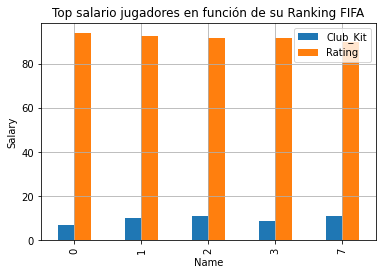

In [122]:
merged.plot(kind="bar", col)
plt.xlabel('Name') 
plt.ylabel('Salary') 
plt.title('Top salario jugadores en función de su Ranking FIFA') 
plt.grid()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

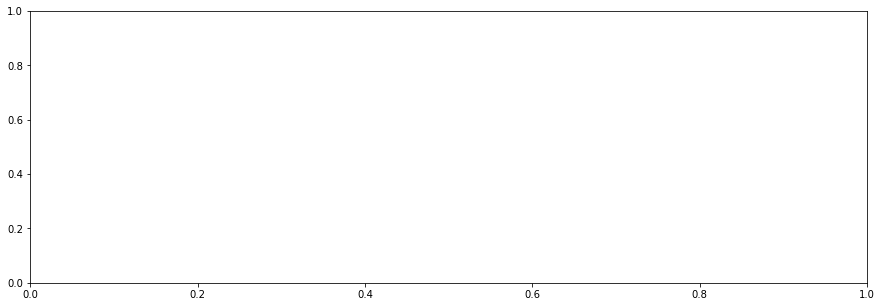

In [124]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Salary", y="Name", data=merged, ax=ax)
plt.xticks(rotation=70, ha='right')
plt.title("Jugadores mejor valorados ")
plt.show()

In [126]:
plt.bar["Rating"], merged["Salary"]


TypeError: 'function' object is not subscriptable